<a href="https://colab.research.google.com/github/Lu1sV1rus/Investigacion-de-Operaciones-/blob/main/Inventario_con_descuento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=4>Inventario con descuento</font>

---

<font size=3>Importamos las librerias a utilizar</font>

In [30]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

<font size=3>Ejemplo</font>

LubeCar se especializa en cambios rápidos de aceite para motor de automóvil.

El servicio compra aceite para motor a granel, a $3$ $
 por galón.

Si LubeCar compra más de $1000$ galones, obtiene un descuento de
$0.5$ $ por galón.

En el servicio se atienden unos $150$ autos diarios, y cada cambio de aceite requiere de $1.25$ galones.

LubeCar guarda el aceite a granel con un costo de $0.02$ $
 por galón y por día.

También, el costo de colocar un pedido de aceite a granel es de $20$ $.

Hay un tiempo de $2$ días para la entrega. Determine la política óptima de inventario.

In [31]:
# Definimos las variables a utilizar
c1, c2, d, h, K, L, Q, Qop, t1=sp.symbols("c1, c2, d, h, K, L, Q, Qop, t1")
# Definimos las funciones a utilizar
T=sp.Function("T")
Qo=sp.Function("Qo")

In [32]:
#Valores
c1=3      # Costo 1
c2=2.5    # Costo 2 con descuento
d=187.5   # Demanda diaria
h=0.02    # Costo de mantenimiento
K=20      # Costo de ordenar
L=2       # Tiempo de entrega
q=1000    # Punto de quiebre

Paso 1. Calcular Q óptimo

In [54]:
# Definimos una funcion Qop que calcula la Q*
def Qop(K,d,h):
  return float(np.sqrt((2*K*d)/h))   # Regresa el valor de la raiz de (2*k*d)/h

In [55]:
Qo=Qop(K,d,h)   # Guardamos el valor en Qo
print(Qo)       # Imprimimos el valor

612.3724356957945


In [71]:
# Definimos una funcion T2 que calcula dependiendo el valor de Q
def T2(Q,c1,h,K,d,q,c2):
  return np.where(Q>q, (c2*d+(K*d)/Q+(h*Q)/2), (c1*d+(K*d)/Q+(h*Q)/2))  # Regresa el valor dependiendo de la condicion

/tmp/ipython-input-176419463.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


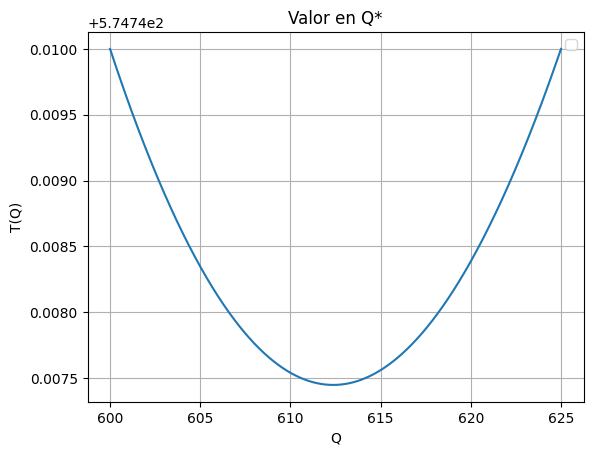

In [72]:
# Grafica
x=np.linspace(600,625,1000)       # Crea un vector de 600-625
plt.plot(x, T2(x,c1,h,K,d,q,c2))  # Grafica el vector en x, y el valor de x evaluado en T2
plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Valor en Q*")
plt.legend()
plt.grid(True)
plt.show()

Paso 2. Determinar la zona en que se encuentra q

In [59]:
# Definimos una funcion T que calcula dependiendo el valor de Q
def T(Q):
  if Q>q:
    return (c2*d+(K*d)/Q+(h*Q)/2)
  else:
    return (c1*d+(K*d)/Q+(h*Q)/2)

In [60]:
# Creamos una ecuacion con Q_1 como incognita
eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)
eq # Mostramos la ecuacion

Eq(Q**2 - 10599.7448713916*Q + 375000.0, 0)

In [63]:
# Resolvemos la ecuacion con sp.solve(ecuacion,incognita)
sol=sp.solve(eq,Q)  # Guardamos la solucion
sol                 # Mostramos la solucion

[35.4970848447485, 10564.2477865469]

In [62]:
sol[1] #Dado que Q*<Q1, la solución debe ser la mayor a Q*, asi que es valor guardado en sol[1]

10564.2477865469

Como $Qop=612 < q=1000 < Q_1=10564$, $q$ está en la zona II. Por tanto:

$Qoo = q$

---

<font size=3 color="tomato">Ejercicio 1:</font>
Escriba una función que calcula la Q óptima.
Es decir, que resuelva de manera interna la ecuación cuadrática y seleccione la solución correcta e indique en qué región está.

In [41]:
# Creamos una funcion
def Rq(Qo):
  eq=sp.Eq(Q**2 + (2/h)*(c2*d-T(Qo))*Q+2*K*d/h,0)   # Creamos la ecuacion
  sol=sp.solve(eq,Q)                                # La resolvemos
  Q1=sol[1]                                         # Guardamos la segunda solucion en Q1

  if Qo<q & q<Q1:                                   # Con if delimitamos las zonas
    qoo=q                                           # En la zona 2 modificamos el valor de Q*=q
    print("La Q óptima está en la región II")
  else:                                             # En las otras zonas modificamos el valor de Q*=Q1
    qoo=Qo
    if Q1<q:                                        # En la zona 3, Q*<Q1<q
      print("La Q óptima está en la región III")
    else:
      print("La Q óptima está en la región I")

  return qoo                                        # Regresamos el valor de Q*

Qoop=Rq(Qo)                                         # Guardamos el valor de Q* en Qoop
print("La Q óptima es:", Qoop)                      # Mostramos el valor de Q*

La Q óptima está en la región II
La Q óptima es: 1000


In [42]:
# Codigo extraido de Github
def T3(Q, c1, c2, h, K, d, q):  #Otra forma para T2 es T3
    Q = np.array(Q)
    c = np.where(Q <= q, c1, c2)   # opciones
    return c*d + (K*d)/Q + (h*Q)/2

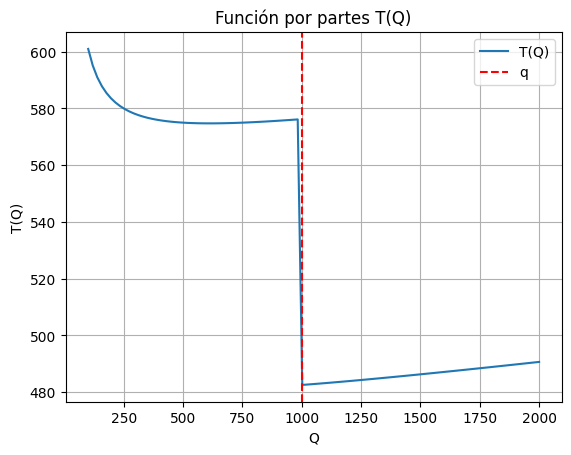

In [43]:
# Codigo extraido de Github
Q_vals = np.linspace(100, 2000, 100)    # Creamos un vector de 100-2000 y lo guardamos en Q_vals
T_vals = T3(Q_vals, c1, c2, h, K, d, q) # Evaluamos y guardamos los valores en T_vals

plt.plot(Q_vals, T_vals, label="T(Q)")  # Creamos la grafica
plt.axvline(q, color='red', linestyle='--', label="q")  # Marcamos el punto de quiebre
plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Función por partes T(Q)")
plt.legend()
plt.grid(True)
plt.show()

Para calcular el tiempo de retraso efectivo

In [44]:
# Calculos el tiempo de retraso efectivo
t=Qo/d
print("El tiempo de retraso efectivo es:", t)

# Calculamos el valor minimo de (L/t)
n=int(np.floor(L/t))
print("El número de pedidos es:", n)

# Calculamos el tiempo de retraso restante
Le=L-(n*t)
print("El tiempo de retraso restante es:", np.ceil(Le))

El tiempo de retraso efectivo es: 3.2659863237109037
El número de pedidos es: 0
El tiempo de retraso restante es: 2.0


Por tanto la política del inventario debe ser:

In [45]:
# Imprimimos la politica
print("Pedir", q, "cuando el inventario caiga a:", np.ceil(Le*d))

Pedir 1000 cuando el inventario caiga a: 375.0


<font size=3 color="tomato">Ejercicio 2: </font> Escribir una función que reciba los datos del problema y devuelva la política óptima del inventario.

In [77]:
# Creamos una funcion que realize los pasos 1 y 2
def inv(c1,c2,d,h,K,L,q):         # Obtenemos los valores
  Qopt=np.sqrt((2*K*d)/h)         # Obtenemos el valor de Q*
  print("La Q óptima es:", Qopt)
  print("-----------------------")

  TQo=np.where(Qopt>q, (c2*d+(K*d)/Qopt+(h*Qopt)/2), (c1*d+(K*d)/Qopt+(h*Qopt)/2))  # Obtenemos el valor de T(q)
  print("La T(Q) es:", TQo)

  eq=sp.Eq(Q**2 + (2/h)*(c2*d-TQo)*Q+2*K*d/h,0)   # Creamos la ecuacion para Q1
  sol=sp.solve(eq,Q)                              # Resolvemos la ec
  Q1=sol[1]                                       # Guardamos la segunda solucion en Q1
  print("La Q1 es:", Q1)

  # Obtenemos la zona
  if Qopt<q & q<Q1:                                 # Con if delimitamos las zonas
    qoo=q                                           # En la zona 2 modificamos el valor de Q*=q
    print("La Q óptima está en la región II")
  else:                                             # En las otras zonas modificamos el valor de Q*=Q1
    qoo=Qo
    if Q1<q:                                        # En la zona 3, Q*<Q1<q
      print("La Q óptima está en la región III")
    else:
      print("La Q óptima está en la región I")

  print("La Q óptima es:", qoo)
  print("-----------------------")

  # Calculamos el tiempo de retraso
  t=Qopt/d
  print("El tiempo de retraso efectivo es:", t)

  n=int(np.floor(L/t))
  print("El número de pedidos es:", n)

  Le=L-(n*t)
  print("El tiempo de retraso restante es:", np.ceil(Le))
  print("-----------------------")

  # Imprimos la politica de inventario
  print("La política del inventario debe ser:")
  print("Pedir", np.ceil(qoo), "cuando el inventario caiga a:", np.ceil(Le*d))

inv(c1,c2,d,h,K,L,q)

La Q óptima es: 612.3724356957945
-----------------------
La T(Q) es: 574.7474487139159
La Q1 es: 10564.2477865469
La Q óptima está en la región II
La Q óptima es: 1000
-----------------------
El tiempo de retraso efectivo es: 3.2659863237109037
El número de pedidos es: 0
El tiempo de retraso restante es: 2.0
-----------------------
La política del inventario debe ser:
Pedir 1000.0 cuando el inventario caiga a: 375.0


In [78]:
# Codigo para solo la politica de inventario
def politica(c1,c2,d,h,K,L,q): # Obtenemos los valores
  Qopt=np.sqrt((2*K*d)/h)      # Calculamos Q*

  TQo=np.where(Qopt>q, (c2*d+(K*d)/Qopt+(h*Qopt)/2), (c1*d+(K*d)/Qopt+(h*Qopt)/2))  # Obtenemos el valor de T(q)
  eq=sp.Eq(Q**2 + (2/h)*(c2*d-TQo)*Q+2*K*d/h,0)                                     # Creamos la ecuacion para Q1
  sol=sp.solve(eq,Q)                                                                # Guardamos el valor de la solucion
  Q1=sol[1]                                                                         # Guardamos la segunda solucion en Q1

  qoo=np.where(Qopt<q & q<Q1, q, Qopt)       # Asignamos un valor a Q*, si esta en la zona 2 Q*=q, y en zona 1 y 3 Q*=Q*

  t=Qopt/d                                   # Calculos el tiempo de retraso efectivo
  n=int(np.floor(L/t))                       # Calculamos el valor minimo de (L/t)
  Le=L-(n*t)                                 # Calculamos el tiempo de retraso restante

  print("La política del inventario:")       # Imprimimos la politica de inventarios
  print("Pedir", np.ceil(qoo), "cuando el inventario caiga a:", np.ceil(Le*d))

politica(c1,c2,d,h,K,L,q)

La política del inventario:
Pedir 1000.0 cuando el inventario caiga a: 375.0


In [79]:
# Ejemplo en clase
c12=3
c22=3
d2=30
h2=0.05
K2=100
L2=30
q2=300

politica(c12,c22,d2,h2,K2,L2,q2)

La política del inventario:
Pedir 347.0 cuando el inventario caiga a: 208.0


/tmp/ipython-input-3573057094.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


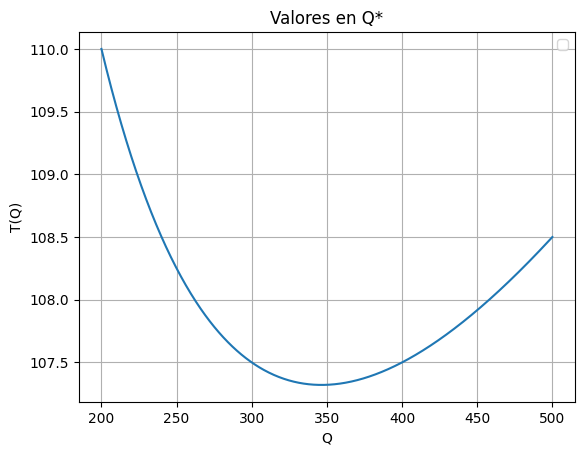

In [80]:
x=np.linspace(200,500,1000)
plt.plot(x, T2(x,c12,h2,K2,d2,q2,c22))
plt.xlabel("Q")
plt.ylabel("T(Q)")
plt.title("Valores en Q*")
plt.legend()
plt.grid(True)
plt.show()